In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
df.head() # 처음 5개의 행을 출력 df -> dataframe

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [43]:
import numpy as np
# 농어의 모든 특성 - 길이, 높이, 너비
perch_full = df.to_numpy() # 데이터 프레임 형태를 넘파이 배열로 변경.
print(perch_full) # 학습 데이터

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [44]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]     
     ) # 정답 데이터 - 농어의 길이, 높이, 너비의 특성을 가지고 무게를 예측

In [45]:
# 학습 세트, 테스트 세트 분리.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight)

In [46]:
print(train_input.shape, test_input.shape)

(42, 3) (14, 3)


In [47]:
# 특성 공학 - 특성을 조합해서 새로운 특성을 여러개 만들어 주는 방법
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly = PolynomialFeatures(include_bias = False) # include_bias - 절편에 곱해지는 1은 제외
poly.fit([[2,3]])
result = poly.transform([[2,3]])
print(result)

[[2. 3. 4. 6. 9.]]


In [49]:
poly.get_feature_names_out() # 특성 조합 공식을 확인

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [50]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [51]:
test_poly = poly.transform(test_input)
print(test_poly.shape)

(14, 9)


In [52]:
# 다중 회귀 모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9920472599112138


In [53]:
print(lr.score(test_poly, test_target))

0.935683359247428


In [54]:
# 무조건 특성 조합이 많을 수록 예측 결정 계수가 높아질까? 아니다.
poly = PolynomialFeatures(degree = 5, include_bias=False) # degree - 5 특성 최대 조합 차수를 5차까지. x⁵
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [55]:
print(train_poly.shape, test_poly.shape)

(42, 55) (14, 55)


In [56]:
lr.fit(train_poly, train_target) # 훈련
print(lr.score(train_poly, train_target))

0.9999999999999994


In [73]:
print(lr.score(test_poly, test_target)) # 과대 적합 -> 규제 -> 훈련세트의 결정 계수는 낮추고, 테스트 세트의 결졍 계수는 높인다.

-32404.324857017607


In [58]:
# 훈련 세트, 테스트 세트 - 표준 점수, 특정 특성에 편향된 규제를 하지 않기 위해서!
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [59]:
# 릿지 모델
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9915456960583452
0.975159280197704


In [60]:
# 최적의 alpha 값 찾기 - 하이퍼 파라미터
train_score = [] # 훈련 세트 결정 계수
test_score = [] # 테스트 세트 결정 계수
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 규제 강도(alpha)를 달리해서 Ridge 모델 객체 생성
    ridge = Ridge(alpha = alpha)

    # 훈련
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [61]:
print(train_score)

[0.996001467646047, 0.9941215674770748, 0.9927224904797156, 0.9915456960583452, 0.9890385778113092, 0.9805959618919632]


In [62]:
print(test_score)

[0.8203111257411282, 0.9461040963340446, 0.965958518298982, 0.975159280197704, 0.9793330780129945, 0.9737607593657359]


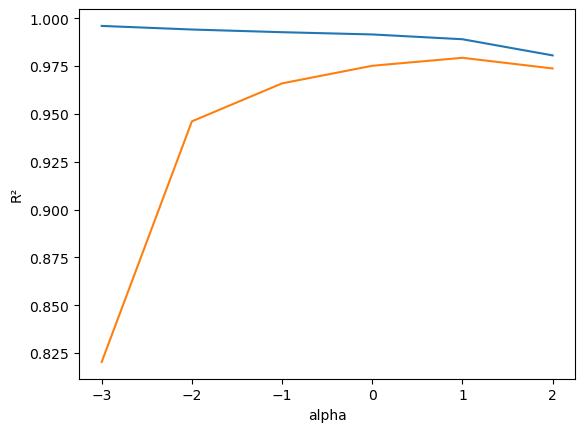

In [63]:
import matplotlib.pyplot as plt

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R²')
plt.show()

In [64]:
ridge = Ridge(alpha=100)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9805959618919632
0.9737607593657359


In [65]:
# 라쏘 규제 선형 모델
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 10000)  # 반복 횟수 늘리기
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9908906775063224


In [66]:
print(lasso.score(test_scaled, test_target))

0.9757393073511464


In [67]:
train_score = [] # 훈련 세트 결정 계수
test_score = [] # 테스트 세트 결정 계수

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 규제별 라소 모델 객체
    lasso = Lasso(alpha = alpha, max_iter=10000000)

    # 훈련
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

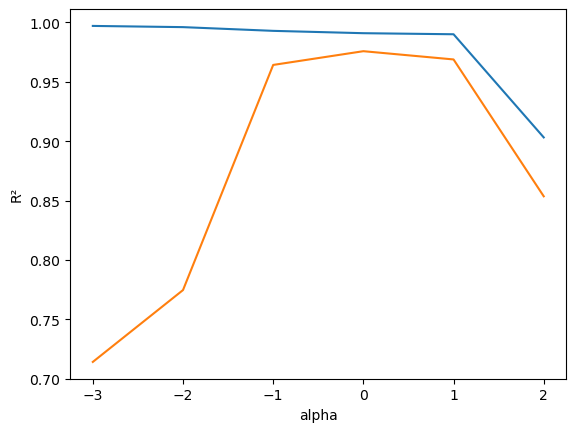

In [68]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R²')
plt.show()

In [69]:
lasso = Lasso(alpha=10, max_iter=10000)
lasso.fit(train_scaled, train_target) # 훈련
print(lasso.score(train_scaled, train_target)) # 훈련 세트 결정 계수
print(lasso.score(test_scaled, test_target)) # 테스트 세트 결정 계수

0.9899981959606621
0.9687927819616373


In [70]:
print(train_scaled.shape)

(42, 55)


In [71]:
lasso.coef_

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  23.03393129,   0.        ,  92.22850463,
         0.        ,   0.        , 114.35092131,  98.20553747,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])

In [75]:
np.sum(lasso.coef_ == 0) # 가중치가 0이 된 총 합계 - 특성 중에서 사용되지 않은 특성의 갯수

np.int64(51)